# Projet personnel sur l'analyse des données

## Nettoyage et gestion des données

### Réalisé par: Karim Gargouri

#### Ce projet est réalisé à l'aide du langage de programmation Python ainsi que ces libraires de sciences des données:
### Numpy, Pandas, Matplotlib et d'autres libraires nécessaires à l'import et l'export des données.
### Ce projet se résume en ces étapes ci-dessous:
0. Retrouver des données à analyser et à nettoyer sous la forme de plusieurs fichiers Excel.
1. Fusionner toutes les données dans un seul Dataframe.
2. Effectuer l'analyse des données afin de détecter des valeurs à nettoyer.
3. Effectuer le nettoyage des données.
4. Créer de divers diagrammes de statistique.
5. Exporter les données dans une base des données SQL.

#### Introduction
- Des données sur la vente de plusieurs modèle de vélos dans le monde sont représentées sous forme d'un fichier Excel. Elles ont été tirées du site internet **[suivant](https://www.learningcontainer.com/sample-excel-data-for-analysis/).**
- Ces données ont été réparties sur 2 fichiers Excel: Le premier des données pour l'année 2013 et l'autre pour l'année 2014.
    - Chaque fichier contient une seule feuille et la meme entete (memes noms des colonnes):

**- Quelques informations ont été changées ou effacées manuellement pour qu'on puisse les analyser et les nettoyer.**

##### Tout d'abord il faut importer les librairies nécessaires

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

#### Étape 1 Charger et fusionner toutes les données sur Pandas (Python):
- Afin de pouvoir manipuler les données et les corriger on va charger toutes les données des 2 fichiers sur Pandas:

In [2]:
# List files
path = os.getcwd()
files = os.listdir(path)
files

['.ipynb_checkpoints',
 'Analyse des données.ipynb',
 'Erreurs.txt',
 'sample-xls-file-for-testing-2013.xls',
 'sample-xls-file-for-testing-2014.xls',
 'xlsx']

In [3]:
# Pick out 'xls' files
files_xls = [f for f in files if f[-3:] == 'xls']
files_xls

['sample-xls-file-for-testing-2013.xls',
 'sample-xls-file-for-testing-2014.xls']

In [4]:
# Initialize empty dataframe
df = pd.DataFrame()

#Loop over list of files to append to empty dataframe
for f in files_xls:
    data = pd.read_excel(f,
                         index_col='Segment',
                         sheet_name='Sheet1')
    df = df.append(data)
df

,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
Segment,,,,,,,,,,,,,,,
Enterprise,Canada,Montana,None,345.0,5.0,125.0,43125.0,0.0,43125.0,41400.0,1725.0,2013-10-01,10.0,October,2013.0
Midmarket,France,Paseo,None,549.0,10.0,15.0,8235.0,0.0,8235.0,5490.0,2745.0,2013-09-01,9.0,September,2013.0
Small Business,Mexico,Paseo,None,788.0,10.0,300.0,236400.0,0.0,236400.0,197000.0,39400.0,2013-09-01,9.0,September,2013.0
Government,Canada,Paseo,None,1725.0,10.0,350.0,603750.0,0.0,603750.0,448500.0,155250.0,2013-11-01,11.0,November,2013.0
Channel Partners,United States of America,Paseo,None,912.0,10.0,12.0,10944.0,0.0,10944.0,2736.0,8208.0,2013-11-01,11.0,November,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Channel Partners,Germany,Montana,None,1545.0,5.0,12.0,18540.0,0.0,18540.0,4635.0,13905.0,2014-06-01,6.0,June,2014.0
Midmarket,Mexico,Montana,None,2470.0,5.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6.0,June,2014.0
Enterprise,Canada,Montana,None,2665.5,5.0,125.0,333187.5,0.0,333187.5,319860.0,13327.5,2014-07-01,7.0,July,2014.0


- Afin de vérifier les types des données:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, Enterprise to Government
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Country              714 non-null    object        
 1   Product              189 non-null    object        
 2   Discount Band        189 non-null    object        
 3   Units Sold           189 non-null    float64       
 4   Manufacturing Price  189 non-null    float64       
 5   Sale Price           189 non-null    float64       
 6   Gross Sales          189 non-null    float64       
 7   Discounts            189 non-null    float64       
 8    Sales               189 non-null    float64       
 9   COGS                 189 non-null    float64       
 10  Profit               189 non-null    float64       
 11  Date                 189 non-null    datetime64[ns]
 12  Month Number         189 non-null    float64       
 13  Month Name           189

+ Les informations et les types des données sont corrects.
+ On prend le cas ou les colonnes qu'on va enlever dans la prochaine commande ne seront pas importants pour notre base des données.

In [6]:
df.drop(['Year','Month Name','Month Number','Discounts',' Sales','Gross Sales','COGS'],axis=1,inplace=True)

In [7]:
df

,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Profit,Date
Segment,,,,,,,,
Enterprise,Canada,Montana,None,345.0,5.0,125.0,1725.0,2013-10-01
Midmarket,France,Paseo,None,549.0,10.0,15.0,2745.0,2013-09-01
Small Business,Mexico,Paseo,None,788.0,10.0,300.0,39400.0,2013-09-01
Government,Canada,Paseo,None,1725.0,10.0,350.0,155250.0,2013-11-01
Channel Partners,United States of America,Paseo,None,912.0,10.0,12.0,8208.0,2013-11-01
...,...,...,...,...,...,...,...,...
Channel Partners,Germany,Montana,None,1545.0,5.0,12.0,13905.0,2014-06-01
Midmarket,Mexico,Montana,None,2470.0,5.0,15.0,12350.0,2014-06-01
Enterprise,Canada,Montana,None,2665.5,5.0,125.0,13327.5,2014-07-01


- Afin de détecter les valeurs nulles dans le tableau:

In [8]:
df.isnull().sum()

Country                  0
Product                525
Discount Band          525
Units Sold             525
Manufacturing Price    525
Sale Price             525
Profit                 525
Date                   525
dtype: int64

+ On remarque qu'il y a plusieurs lignes vides et leurs nombres sont égaux
+ On supprime les lignes ou il y a les données pour les 8 colonnes vides.

In [9]:
df.dropna(axis=0,thresh=8,inplace=True)

In [10]:
df.isnull().sum()

Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Profit                 0
Date                   0
dtype: int64

+ On peut remarquer que toutes les lignes vides ont été enlevées
--------
+ Vérification des données:
    + On sait que pour le meme produit le cout d'une d'un vélo doit etre le meme

In [11]:
df['Manufacturing Price'].value_counts()

10.0     49
5.0      31
3.0      29
250.0    28
120.0    27
260.0    22
0.0       2
12.0      1
Name: Manufacturing Price, dtype: int64

+ La valeur 12.0 n'apparait qu'une seule fois et la valeur 0.0 n'est pas logique!
+ Vérifions leurs produits équivalents:
    + recherche des 0.0 et 12.0 dans 'Manufacturing Price' (**Construction en cours**)

In [12]:
df.loc[:,'Manufacturing Price']

Segment
Enterprise           5.0
Midmarket           10.0
Small Business      10.0
Government          10.0
Channel Partners    10.0
                    ... 
Channel Partners     5.0
Midmarket            5.0
Enterprise           5.0
Small Business       5.0
Government           5.0
Name: Manufacturing Price, Length: 189, dtype: float64

In [13]:
df[df.eq('12.0').any(1)]

,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Profit,Date
Segment,,,,,,,,


#### Création d'un histogramme qui permet de vérifier la cohérence des données (Les produit en lien avec leurs prix unitaires) 
**(Construction en cours)**

array([[<AxesSubplot:title={'center':'Units Sold'}>,
        <AxesSubplot:title={'center':'Manufacturing Price'}>],
       [<AxesSubplot:title={'center':'Sale Price'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

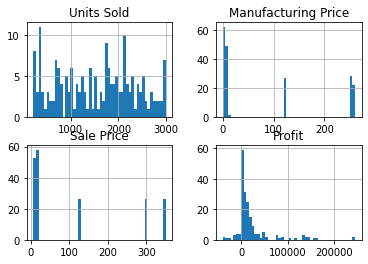

In [14]:
df.hist(bins=50)

<AxesSubplot:xlabel='Segment'>

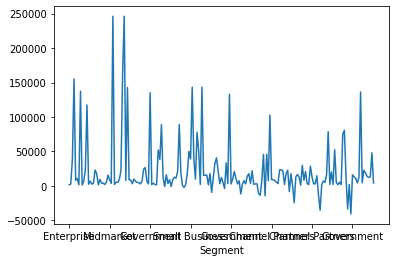

In [15]:
df['Profit'].plot()

#### Après avoir nettoyé les données on exporte notre DataFrame vers notre base de données SQL:

In [18]:
df.to_sql(name='maBD.db',con=sqlite3.connect('maBD.db'),if_exists='replace')

c:\users\karim\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
